In [14]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [17]:
X,y = load_iris(return_X_y=True, as_frame=True)

In [20]:
display(X,y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [23]:
X = X.loc[:,['petal length (cm)', 'petal width (cm)']]
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


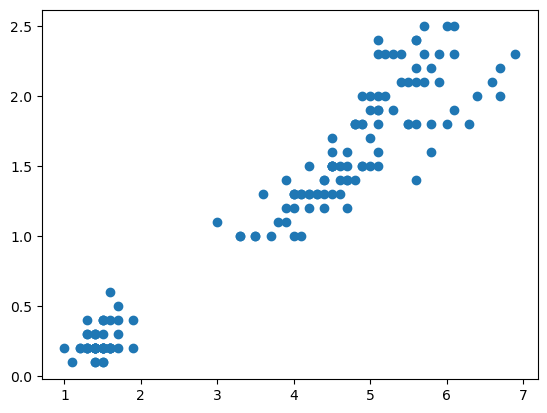

In [26]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'])
plt.show()

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

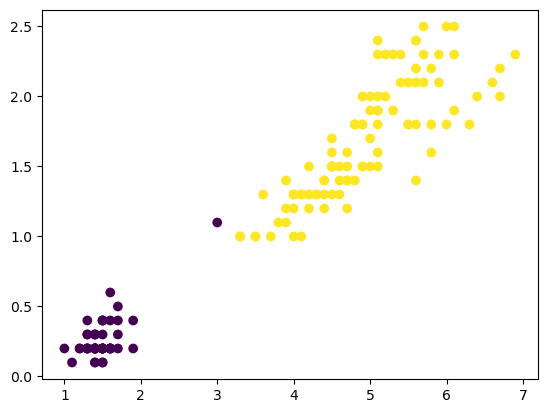

In [33]:
fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans.labels_)
plt.show()

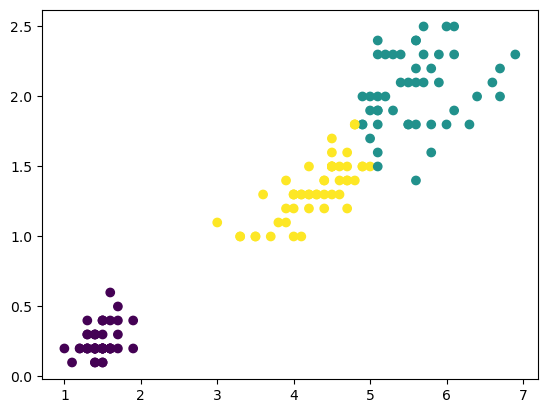

In [53]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans3.labels_)
plt.show()

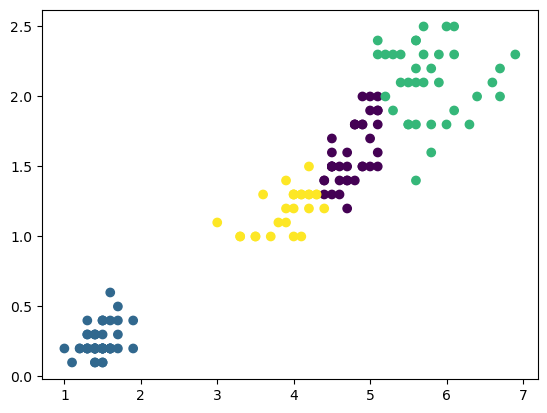

In [38]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_

fig, ax = plt.subplots()
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans4.labels_)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


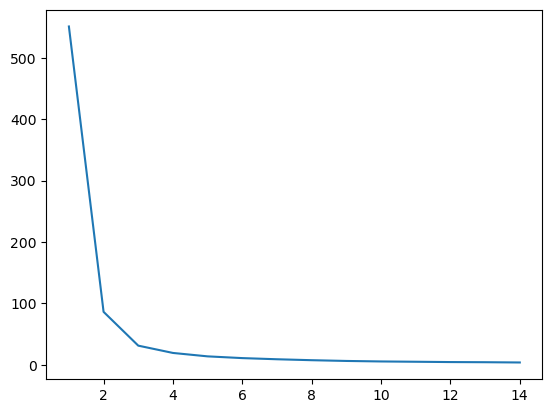

In [42]:
#elbow method
k_values = []
inertia = []

for i in range (1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    inertia.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.plot(k_values, inertia)
plt.show()

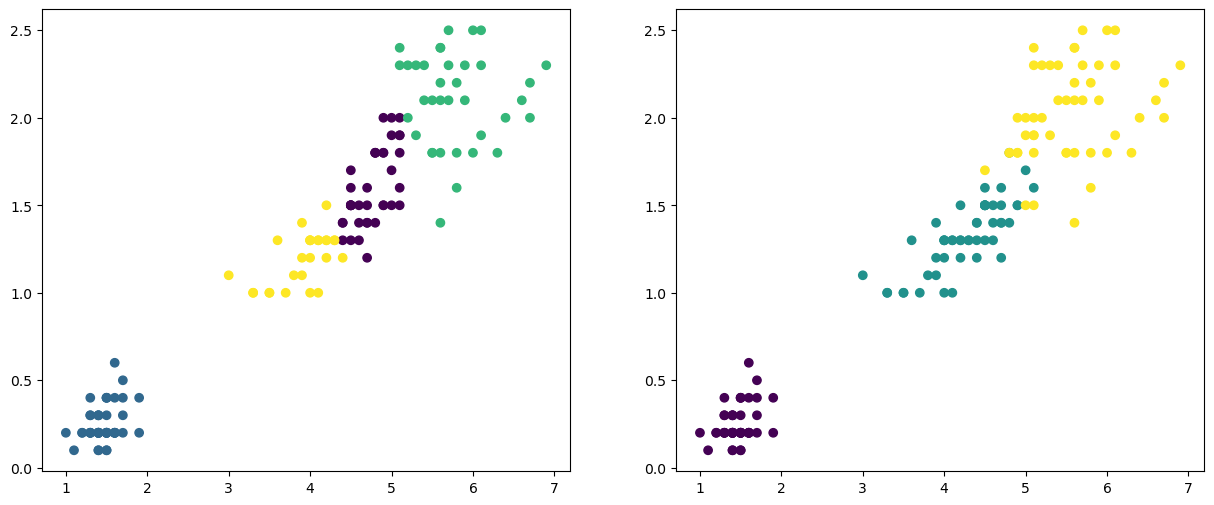

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans4.labels_)
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)
plt.show()

In [50]:
from sklearn import metrics
metrics.adjusted_rand_score(y, kmeans.labels_)

0.3216987926357266

In [55]:
metrics.adjusted_rand_score(y, kmeans3.labels_)

0.8856970310281228

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


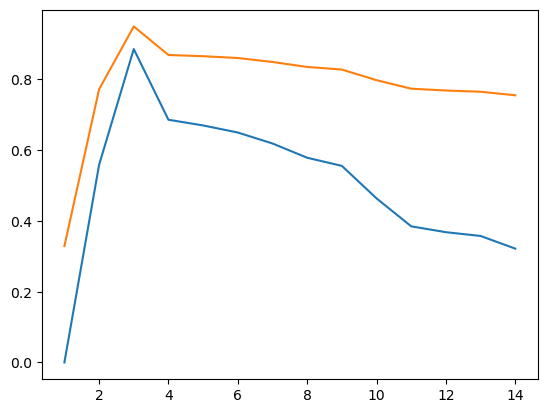

In [59]:
k_values = []
ARI = []
RI = []

for i in range (1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    ARI.append(metrics.adjusted_rand_score(y, kmeans.labels_))
    RI.append(metrics.rand_score(y, kmeans.labels_))
fig, ax = plt.subplots()
ax.plot(k_values, ARI)
ax.plot(k_values, RI)
plt.show()

In [61]:
metrics.silhouette_score(X, kmeans.labels_)

0.3865926479518858

In [62]:
metrics.silhouette_score(X, kmeans3.labels_)

0.6604800083974887